In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

#sns.set(font='NanumBarunGothic', font_scale=2.5)
sns.set(font='Malgun Gothic', font_scale=2.5)
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import pandas as pd
df = pd.read_csv('bank2.csv')
df.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [3]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4,0,0.0,93.811775,0.0,13,29.681827


In [4]:
df['BAD'] = df['BAD'].astype(str)
df['DELINQ'] = df['DELINQ'].astype(int)
df['DELINQ'] = df['DELINQ'].astype(str)

In [5]:
df.dtypes

BAD         object
LOAN         int64
MORTDUE      int64
VALUE      float64
REASON      object
JOB         object
YOJ          int64
DEROG        int64
DELINQ      object
CLAGE      float64
NINQ       float64
CLNO         int64
DEBTINC    float64
dtype: object

In [6]:
df['DELINQ'] = df['DELINQ'].astype(int)

In [7]:
from scipy import stats

df1 =pd.crosstab(df['DELINQ'], df['BAD'])
chi, pval, dof, expected = stats.chi2_contingency(df1)

print('chi-square test')
print('chisq : {0:0.3f}'.format(chi))
print('p : {0:0.7f}'.format(pval))
print('degree of freedom : {}'.format(dof))
print('expected value : \n{}'.format(expected.round(3)))

chi-square test
chisq : 325.261
p : 0.0000000
degree of freedom : 9
expected value : 
[[2.871849e+03 2.911510e+02]
 [3.232310e+02 3.276900e+01]
 [1.216650e+02 1.233500e+01]
 [4.539800e+01 4.602000e+00]
 [2.088300e+01 2.117000e+00]
 [6.356000e+00 6.440000e-01]
 [6.356000e+00 6.440000e-01]
 [5.448000e+00 5.520000e-01]
 [9.080000e-01 9.200000e-02]
 [9.080000e-01 9.200000e-02]]


In [8]:
df1

BAD,0,1
DELINQ,,
0,2943,220
1,307,49
2,101,33
3,39,11
4,13,10
5,0,7
6,0,7
7,0,6
8,0,1


<Figure size 1440x2160 with 0 Axes>

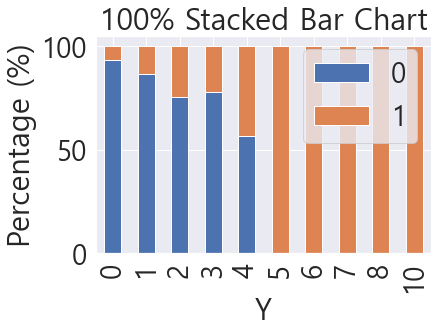

In [9]:
df1['Total'] = df1.sum(axis=1)
# Normalize each group to sum up to 100%
for col in ['0', '1']:
    df1[col] = df1[col] / df1['Total'] * 100

df_group_100 = df1.drop('Total', axis=1)
# 그래프 크기 설정
plt.figure(figsize=(20, 30))

# 100% 스택 바 차트 그리기
df_group_100.plot(kind='bar', stacked=True)

# 라벨 및 제목 추가
plt.xlabel('Y')
plt.ylabel('Percentage (%)')
plt.title('100% Stacked Bar Chart')
plt.legend()

# 그래프 보여주기
plt.show()

In [10]:
df1 = df[df['DELINQ'] <= 4]

In [11]:
df2 =pd.crosstab(df1['DELINQ'], df1['BAD'])
from scipy import stats

chi, pval, dof, expected = stats.chi2_contingency(df2)
print('chi-square test')
print('chisq : {0:0.3f}'.format(chi))
print('p : {0:0.7f}'.format(pval))
print('degree of freedom : {}'.format(dof))
print('expected value : \n{}'.format(expected.round(3)))

chi-square test
chisq : 112.926
p : 0.0000000
degree of freedom : 4
expected value : 
[[2.888805e+03 2.741950e+02]
 [3.251390e+02 3.086100e+01]
 [1.223840e+02 1.161600e+01]
 [4.566600e+01 4.334000e+00]
 [2.100600e+01 1.994000e+00]]


In [12]:
df2.T

DELINQ,0,1,2,3,4
BAD,,,,,
0,2943,307,101,39,13
1,220,49,33,11,10


In [13]:
df2

BAD,0,1
DELINQ,,
0,2943,220
1,307,49
2,101,33
3,39,11
4,13,10


In [14]:
df3 = df[(df['DELINQ'] == 0) |(df['DELINQ'] == 1) ]
df4 =pd.crosstab(df3['DELINQ'], df3['BAD'])
chi, pval, dof, expected = stats.chi2_contingency(df4)
print('chi-square test')
print('chisq : {0:0.3f}'.format(chi))
print('p : {0:0.7f}'.format(pval))
print('degree of freedom : {}'.format(dof))
print('expected value : \n{}'.format(expected.round(3)))

chi-square test
chisq : 20.058
p : 0.0000075
degree of freedom : 1
expected value : 
[[2921.213  241.787]
 [ 328.787   27.213]]


In [15]:
df3 = df[(df['DELINQ'] == 1) |(df['DELINQ'] == 2) ]
df4 =pd.crosstab(df3['DELINQ'], df3['BAD'])
chi, pval, dof, expected = stats.chi2_contingency(df4)
print('chi-square test')
print('chisq : {0:0.3f}'.format(chi))
print('p : {0:0.7f}'.format(pval))
print('degree of freedom : {}'.format(dof))
print('expected value : \n{}'.format(expected.round(3)))

chi-square test
chisq : 7.483
p : 0.0062274
degree of freedom : 1
expected value : 
[[296.424  59.576]
 [111.576  22.424]]


In [16]:
df3 = df[(df['DELINQ'] == 3) |(df['DELINQ'] == 4) ]
df4 =pd.crosstab(df3['DELINQ'], df3['BAD'])
chi, pval, dof, expected = stats.chi2_contingency(df4)
print('chi-square test')
print('chisq : {0:0.3f}'.format(chi))
print('p : {0:0.7f}'.format(pval))
print('degree of freedom : {}'.format(dof))
print('expected value : \n{}'.format(expected.round(3)))

chi-square test
chisq : 2.576
p : 0.1085115
degree of freedom : 1
expected value : 
[[35.616 14.384]
 [16.384  6.616]]


In [17]:
df4

BAD,0,1
DELINQ,,
3,39,11
4,13,10


In [18]:
df3 = df[(df['DELINQ'] == 2) | (df['DELINQ'] == 3) |(df['DELINQ'] == 4) ]
df4 =pd.crosstab(df3['DELINQ'], df3['BAD'])
chi, pval, dof, expected = stats.chi2_contingency(df4)
print('chi-square test')
print('chisq : {0:0.3f}'.format(chi))
print('p : {0:0.7f}'.format(pval))
print('degree of freedom : {}'.format(dof))
print('expected value : \n{}'.format(expected.round(3)))

chi-square test
chisq : 4.189
p : 0.1231234
degree of freedom : 2
expected value : 
[[99.043 34.957]
 [36.957 13.043]
 [17.     6.   ]]


In [19]:
df4

BAD,0,1
DELINQ,,
2,101,33
3,39,11
4,13,10


<Figure size 1440x2160 with 0 Axes>

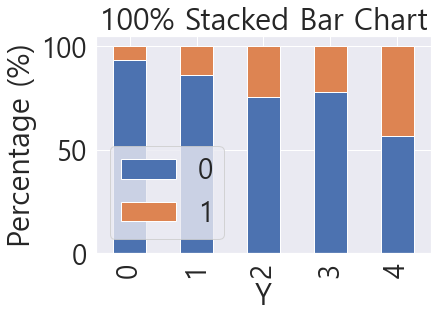

In [20]:
df2['Total'] = df2.sum(axis=1)
# Normalize each group to sum up to 100%
for col in ['0', '1']:
    df2[col] = df2[col] / df2['Total'] * 100

df_group_100 = df2.drop('Total', axis=1)
# 그래프 크기 설정
plt.figure(figsize=(20, 30))

# 100% 스택 바 차트 그리기
df_group_100.plot(kind='bar', stacked=True)

# 라벨 및 제목 추가
plt.xlabel('Y')
plt.ylabel('Percentage (%)')
plt.title('100% Stacked Bar Chart')
plt.legend()

# 그래프 보여주기
plt.show()

In [21]:
# 0구간, 1구간, 2-3구간, 4구간, 5이하구간에 맞춰서 위험도를 구분하는 것이 중요하다